In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE


In [13]:
df = pd.read_csv(r"data\BankChurners_preprocessed.csv")


In [14]:
# Define the feature matrix X and the target vector y
X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X,y)

X_train, X_test, y_train, y_test= train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

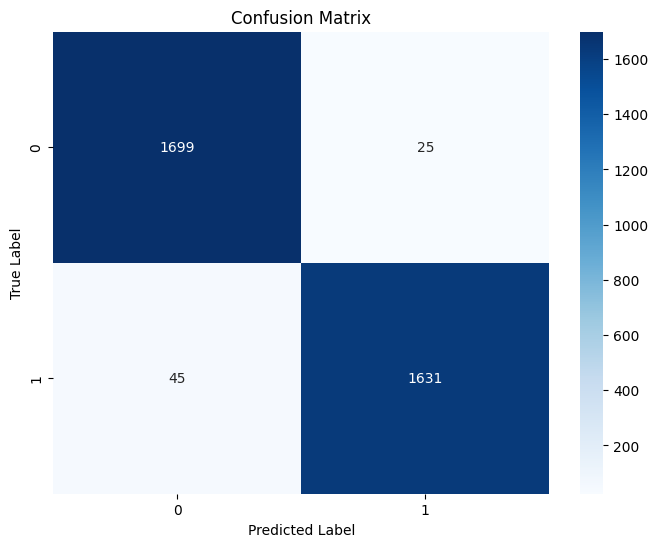

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1724
           1       0.98      0.97      0.98      1676

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400


Accuracy: 0.9794117647058823

ROC AUC:
 0.997649877622668


In [16]:
# Predicting the test data
y_pred = rf_classifier.predict(X_test)

# Calculating different performance metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Detailed classification report
print(classification_report(y_test, y_pred))

# Calculate FPR, TPR, and Thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print("")
print(f"Accuracy: {accuracy}")
print("\nROC AUC:\n", roc_auc)


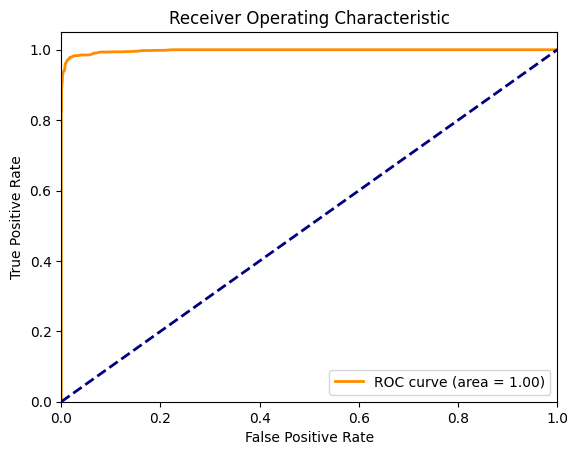

In [17]:
# Predict probabilities for the test set
y_probs = rf_classifier.predict_proba(X_test)[:, 1]  # probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [18]:
# Perform enhanced cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Calculate mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print detailed cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Standard Deviation in CV Scores:", std_cv_score)



Cross-Validation Scores: [0.88499506 0.96396841 0.96444444 0.96790123 0.84790123]
Mean CV Score: 0.9258420776814986
Standard Deviation in CV Scores: 0.04991189477989577


In [19]:
# Extracting feature importances
importances = rf_classifier.feature_importances_
feature_names = X_train.columns
feature_importance_data = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
feature_importance_data


[('Total_Trans_Ct', 0.215561455249421),
 ('Total_Trans_Amt', 0.2120347063616737),
 ('Total_Revolving_Bal', 0.09514503810943764),
 ('Total_Ct_Chng_Q4_Q1', 0.0808951596581696),
 ('Avg_Utilization_Ratio', 0.06795203946346358),
 ('Total_Relationship_Count', 0.06142667934656519),
 ('Total_Amt_Chng_Q4_Q1', 0.053674114318813936),
 ('Avg_Open_To_Buy', 0.02692100837997064),
 ('Credit_Limit', 0.026591849983489978),
 ('Customer_Age', 0.02393260428456429),
 ('Marital_Status_Married', 0.023705591852329778),
 ('Gender', 0.02031827590130444),
 ('Months_Inactive_12_mon', 0.01700844359018034),
 ('Months_on_book', 0.015885294500518028),
 ('Marital_Status_Single', 0.012506389701990337),
 ('Contacts_Count_12_mon', 0.012474473512886868),
 ('Dependent_count', 0.009567551376473459),
 ('Education_Level', 0.009117744853836195),
 ('Income_Category', 0.00908809398269315),
 ('Marital_Status_Unknown', 0.004494052859817747),
 ('Card_Category', 0.0016994327123999663)]

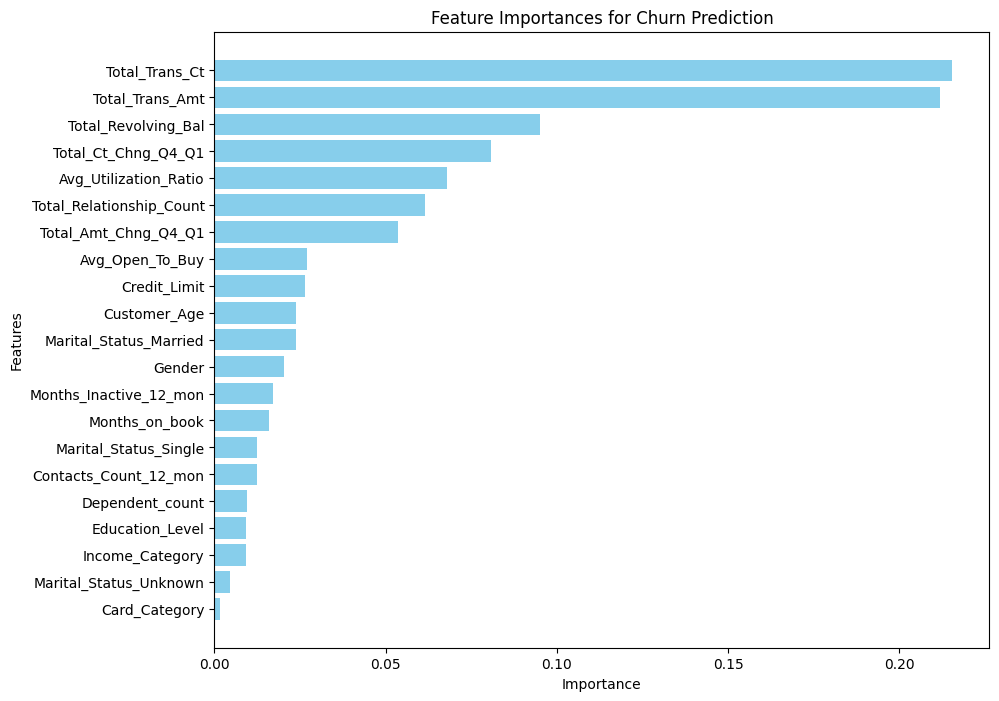

In [20]:
# Extract feature names and their importances
features, importances = zip(*feature_importance_data)

# Creating the bar chart
plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances for Churn Prediction')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


Here are the features ranked by their importance in predicting churn, as determined by the Random Forest model:

- Total_Trans_ct (21.55%): Total Transaction Count
- Total_Trans_Amt (21.2%): Total Transaction Amount
- Total_Revolving_Bal (9.51%): Total Revolving Balance on the Credit Card
- Total_Ct_Chng_Q4_Q1 (8.08%): Change in Transaction Count from Q4 to Q1
- Avg_Utilization_Ratio (6.79%): Average Card Utilization Ratio
- Total_Relationship_Count (6.14%): Number of Products held by the customer
- Total_Amt_Chng_Q4_Q1 (5.36%): Change in Transaction Amount from Q4 to Q1
- Avg_Open_To_Buy (2.69%): Available Credit Line
- Credit_Limit (2.66%)


These features contribute significantly to the model's ability to predict whether a customer will churn or not. The most impactful features are related to transaction behavior and credit utilization, which are critical indicators of customer engagement and satisfaction.

**1. Total_Trans_Ct (21.55%) and Total_Trans_Amt (21.2%)**

**Insights**: These are the top indicators of churn, highlighting the direct impact of how often and how much customers transact. High values in these features generally signify active and engaged customers.

**Strategies:**
- Promote Increased Usage: Encourage increased transactions through loyalty programs, cash-back offers, or tiered rewards systems that incentivize higher spending and more frequent transactions.
- Personalized Offers: Use transaction data to understand customer preferences and tailor offers that are likely to be well-received, encouraging repeat transactions.

**2. Total_Revolving_Bal (9.51%)**

**Insights:** Represents the balance that customers carry from month to month. A high revolving balance can indicate trust in the bank’s credit facilities or possibly financial strain.

**Strategies:**
- Flexible Payment Options: Provide options for easier management of revolving balances, such as flexible payment plans or lower interest rates for consistent on-time payments.
- Financial Wellness Programs: Offer financial advice or tools to help customers manage their credit better, potentially reducing financial stress.

**3. Total_Ct_Chng_Q4_Q1 (8.08%)**

**Insights:** Significant changes in the transaction count between quarters can indicate changes in customer behavior due to seasonal trends or emerging dissatisfaction.

**Strategies:**
- Proactive Customer Engagement: Engage customers with targeted communications or offers immediately when a decrease in transactions is detected.
- Seasonal Campaigns: Develop marketing strategies that align with seasonal spending habits to keep the transaction count steady throughout the year.

**4. Avg_Utilization_Ratio (6.79%)**

**Insights:** Indicates how much of the available credit is being used. High utilization can suggest good engagement, whereas extremely high figures might indicate financial distress.

**Strategies:** 
- Credit Education: Educate customers on the implications of high credit utilization and how to manage it effectively.
- Adjust Credit Limits: For customers consistently using a high percentage of their credit, consider offering periodic credit limit reviews as an incentive for good financial behavior.

**5. Total_Relationship_Count (6.14%)**

**Insights:** The number of products a customer has with the bank. More products typically correlate with higher customer retention.

**Strategies:**
- Cross-Selling Opportunities: Use data to identify products that customers with fewer products might benefit from and target them with special offers.
- Rewards for Product Diversity: Introduce benefits for customers who hold multiple types of products, reinforcing the value of a comprehensive banking relationship.

**6. Total_Amt_Chng_Q4_Q1 (5.36%)**

**Insights:** Changes in the total transaction amount can reflect shifts in economic status or satisfaction levels.

**Strategies:**
- Economic Sensitivity Offers: Introduce offers that are sensitive to economic downturns, such as reduced fees or special savings interest rates during economic hardships.
- Regular Financial Reviews: Offer financial review services that help customers plan their expenditures and investments, adjusting to their changing economic situations.

**7. Avg_Open_To_Buy (2.69%) and Credit_Limit (2.66%)**

**Insights:** These metrics reflect the credit health and spending power of customers. An increase in 'Open to Buy' can signal underutilization of available resources.

**Strategies:**
- Promotions on Credit Usage: Encourage customers to utilize their available credit through targeted promotions that align with their buying habits.
- Dynamic Credit Management: Regularly adjust credit limits based on usage patterns and creditworthiness to optimize financial products' appeal and utility.










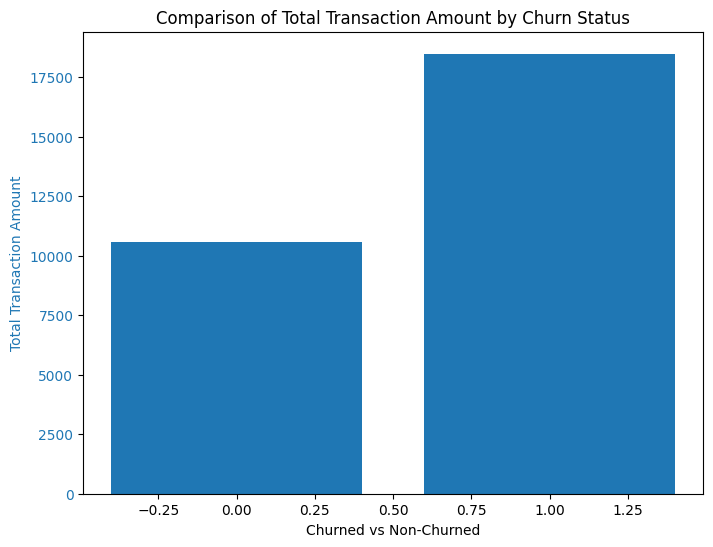

In [24]:
plt.figure(figsize=(8, 6))
color = 'tab:blue'

# Creating the bar chart
plt.bar(df['Attrition_Flag'], df['Total_Trans_Amt'], color=color)

# Setting labels and title
plt.xlabel('Churned vs Non-Churned')
plt.ylabel('Total Transaction Amount', color=color)
plt.title('Comparison of Total Transaction Amount by Churn Status')

# Setting the color of the y-axis labels to match the bar color
plt.tick_params(axis='y', labelcolor=color)

# Showing the plot
plt.show()


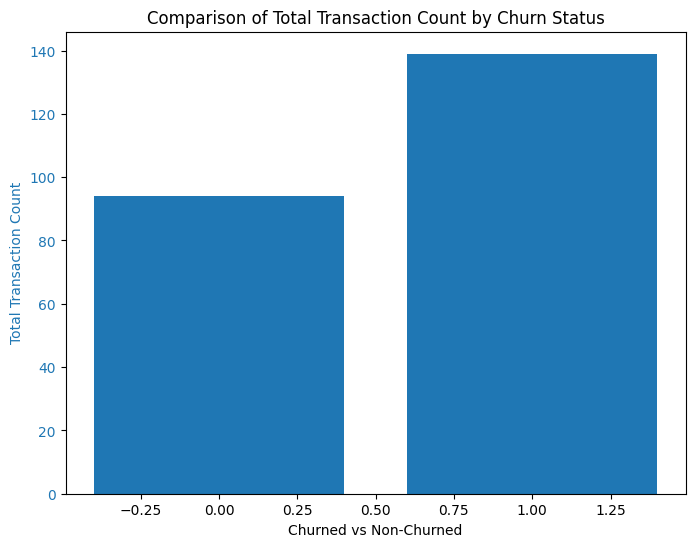

In [26]:
plt.figure(figsize=(8, 6))
color = 'tab:blue'

# Creating the bar chart
plt.bar(df['Attrition_Flag'], df['Total_Trans_Ct'], color=color)

# Setting labels and title
plt.xlabel('Churned vs Non-Churned')
plt.ylabel('Total Transaction Count', color=color)
plt.title('Comparison of Total Transaction Count by Churn Status')

# Setting the color of the y-axis labels to match the bar color
plt.tick_params(axis='y', labelcolor=color)

# Showing the plot
plt.show()